***O Problema*** 

Em um futuro próximo e fictício determinada região do Brasil terá um problema sério com o Zika vírus. As agências de saúde não conseguem combater a proliferação dos mosquitos (Aedes Aegypt) que transmitem o Zika e portanto o governo pediu ajuda de diversas universidades nessa causa. Você vive neste momento do tempo e recentemente leu um artigo em que pesquisadores descobriram que se o tempo de vida médio do mosquito caísse em 10% as atuais força-tarefas conseguiriam combater a proliferação. Em um surto de criatividade você lembra que na universidade em que trabalha há um laboratório estudando o Aedes Aegypt e pode quem sabe criar um modelo para prever o tempo de vida deles. Se o seu modelo funcionar é possível identificar quais fatores influenciam mais no resultado final e a devida alteração nos fatores pode reduzir o tempo de vida dos mosquitos.

***Os dados***


$y = a*T+b*L+c*H+d*V + e*P + f$

Temperatura = T
Luminosidade = L
pH = H
Viscosidade = V
Pressão = P

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
dados = pd.read_csv(r'.\datasets\outros\bacteria_train.csv')
dados_test = pd.read_csv(r'.\datasets\outros\bacteria_test.csv')

In [80]:
dados.head()

,T,L,H,V,P,Meia vida
0,32.962622,0.264622,8.816275,1.478809,0.847658,42.307245
1,57.871541,0.188583,4.538144,2.823074,1.181404,19.884377
2,29.114435,0.253977,7.751076,1.782949,0.913456,36.321885
3,34.429962,0.222498,7.755267,2.087207,0.957653,40.498003
4,23.194881,0.105841,6.086121,1.686923,0.923796,33.004010


In [81]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
T            100 non-null float64
L            100 non-null float64
H            100 non-null float64
V            100 non-null float64
P            100 non-null float64
Meia vida    100 non-null float64
dtypes: float64(6)
memory usage: 4.8 KB


In [82]:
dados.describe()

,T,L,H,V,P,Meia vida
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,36.500217,0.210004,7.522160,2.144180,0.974804,35.050532
std,11.357673,0.072945,1.981272,0.600770,0.139929,8.393728
min,5.905340,0.033621,2.499656,0.698625,0.640935,19.884377
25%,29.176401,0.163851,6.083889,1.764715,0.890123,28.607829
50%,34.716329,0.209338,7.551669,2.100369,0.974588,34.702547
75%,44.476820,0.265023,8.795536,2.542407,1.062133,40.464280
max,60.744661,0.383615,14.123069,3.424755,1.316421,58.421981


In [17]:
# libraries for machine learning
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# regression
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [47]:
X_train = dados.drop('Meia vida',axis=1).values
y_train = dados['Meia vida'].copy().values

In [68]:
X_test = dados_test.drop('Meia vida',axis=1).values
y_test = dados_test['Meia vida'].copy().values

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [70]:
lre = LinearRegression()
lre.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
#train set
y_pred_lre = lre.predict(X_train)
print('R2:   {:.2f}'.format(r2_score(y_train,y_pred_lre)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train,y_pred_lre))))

R2:   0.82
RMSE: 3.53


In [72]:
#test set
y_pred_lre = lre.predict(X_test)
print('R2:   {:.2f}'.format(r2_score(y_test,y_pred_lre)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lre))))

R2:   0.71
RMSE: 3.79


In [73]:
coef = lre.coef_
print(coef)
inter =  lre.intercept_
print(inter)

[-2.29725399  2.15171487  5.9614477   2.46409326  0.13496379]
35.05053200207723


In [ ]:
y_model = a*T + b*L + c*H + d*V + e*P + f

***DecisionTreeRegressor***

In [74]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
#train set
y_pred_tree = tree.predict(X_train)
print('R2:   {:.2f}'.format(r2_score(y_train,y_pred_tree)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train,y_pred_tree))))

R2:   1.00
RMSE: 0.00


In [76]:
#test set
y_pred_tree = lre.predict(X_test)
print('R2:   {:.2f}'.format(r2_score(y_test,y_pred_tree)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))

R2:   0.71
RMSE: 3.79


In [61]:
regressors = [
    KNeighborsRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Ridge(alpha=15, solver='cholesky'),
    Lasso()]

In [63]:
# graph to compare different regressors with the same chosen metric

# regressors = list of regressors we want to use
# metric = chosen metric:'neg_mean_absolute_error','neg_mean_squared_error','rmse,neg_median_absolute_error','r2','AdjR2'
# cv = number of desired folds
def scoringGraph(regressors,metric,cv,X,y):
    score_dict = {}
    log_cols = ['Regressor', metric]
    log = pd.DataFrame(columns=log_cols)
    for item in regressors:
        name = item.__class__.__name__
        if metric == 'rmse':
            result = cross_val_score(item, X, y, scoring='neg_mean_squared_error',cv=cv)
            score_mean = np.sqrt(-result).mean()
        else:
            result = cross_val_score(item, X, y, scoring=metric,cv=cv)
            if metric == 'r2':
                score_mean = result.mean()
            else:
                score_mean = -result.mean()
        score_dict[name] = score_mean

    for item in score_dict:
        log_entry = pd.DataFrame([[item, score_dict[item]]], columns=log_cols)
        log = log.append(log_entry)

    plt.xlabel(metric)
    plt.title('Regressor Score')
    sns.set_color_codes("muted")
    sns.barplot(x=metric, y='Regressor', data=log, color="b")

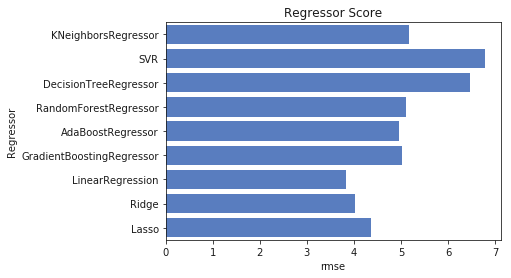

In [78]:
scoringGraph(regressors,'rmse',3,X_train,y_train)

***Agora é sua vez***

Encontre algum algoritmo que encontre um RMSE menor do que o que encontramos usando o ajuste com GridSearchCV. Não esqueça de verificar se está ocorrendo underfitting ou ouverfitting.